In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import os

In [8]:
parent_dir = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.append(parent_dir)
print(parent_dir)
interpolated_dir = os.path.join(parent_dir, "dataset_interpolated_fixed")
# features = ["game_completed", "relative_strength", "score_difference", "type.id", "home_has_possession", "end.down", "end.yardsToEndzone", "end.distance", "field_position_shift", "home_timeouts_left", "away_timeouts_left"]
features = ["game_completed", "relative_strength", "score_difference", "home_has_possession", "end.down", "end.distance", "end.yardsToEndzone",  "home_timeouts_left", "away_timeouts_left"]

/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL/ML


In [12]:
# Reset the modules
modules_to_reload = [
    'process_data',
]

for module_name in modules_to_reload:
    if module_name in sys.modules:
        del sys.modules[module_name]

import process_data

training_data = process_data.load_data(interpolated_dir, 
                                       years = [2016, 2017,2018, 2019, 2020, 2021, 2022], 
                                       history_length = 0, 
                                       features = features, 
                                       label_feature = "home_win")

validation_data = process_data.load_data(interpolated_dir, 
                                       years = [2023], 
                                       history_length = 0, 
                                       features = features, 
                                       label_feature = "home_win",
                                       train = True
                                       )
                                       
test_data = process_data.load_data(interpolated_dir, 
                                       years = [2024],
                                       history_length = 0, 
                                       features = features, 
                                       label_feature = "home_win",
                                       train = False
                                       )

Loading data for 2022
  Processing 271 CSV files in parallel with 8 workers...
  Completed processing 2022
Loading data for 2024
skipping  2024
Loading data for 2023
skipping  2023
Loading data for .DS_Store
Loading data for 2017
  Processing 254 CSV files in parallel with 8 workers...
  Completed processing 2017
Loading data for 2019
  Processing 256 CSV files in parallel with 8 workers...
  Completed processing 2019
Loading data for 2021
  Processing 272 CSV files in parallel with 8 workers...
  Completed processing 2021
Loading data for 2020
  Processing 255 CSV files in parallel with 8 workers...
  Completed processing 2020
Loading data for 2018
  Processing 255 CSV files in parallel with 8 workers...
  Completed processing 2018
Loading data for 2016
  Processing 254 CSV files in parallel with 8 workers...
  Completed processing 2016
Loading data for 2022
skipping  2022
Loading data for 2024
skipping  2024
Loading data for 2023
  Processing 272 CSV files in parallel with 8 workers.

In [51]:
modules_to_reload = [
    'models.direct_prediction_network',
    'models.direct_prediction_network_transformer',
]

for module_name in modules_to_reload:
    if module_name in sys.modules:
        del sys.modules[module_name]

from models.direct_prediction_network import setup_direct_models
from models.direct_prediction_network_transformer import setup_direct_transformer_models


models = setup_direct_models(training_data, validation_data, num_models = 200, features=features, optimize_hyperparams=False)

Range [0.000, 0.005): 3244 train, 526 validation
Starting training on device: cpu
Early stopping at epoch 14
Best epoch: 4, Train Acc: 0.6584, Train Loss: 0.6217, Val Acc: 0.6293, Val Loss: 0.6494
Restored model from best epoch 4 with val_loss: 0.649397
NFL direct model 1/200 completed
Range [0.005, 0.010): 1142 train, 124 validation
Starting training on device: cpu
Early stopping at epoch 18
Best epoch: 8, Train Acc: 0.6637, Train Loss: 0.6130, Val Acc: 0.5887, Val Loss: 0.6753
Restored model from best epoch 8 with val_loss: 0.675329
NFL direct model 2/200 completed
Range [0.010, 0.015): 2157 train, 327 validation
Starting training on device: cpu
Early stopping at epoch 16
Best epoch: 6, Train Acc: 0.6574, Train Loss: 0.6086, Val Acc: 0.6208, Val Loss: 0.6278
Restored model from best epoch 6 with val_loss: 0.627775
NFL direct model 3/200 completed
Range [0.015, 0.020): 1805 train, 288 validation
Starting training on device: cpu
Early stopping at epoch 12
Best epoch: 2, Train Acc: 0.64

In [52]:
models.keys()

dict_keys([0.0, 0.005, 0.01, 0.015, 0.02, 0.025, 0.03, 0.035, 0.04, 0.045, 0.05, 0.055, 0.06, 0.065, 0.07, 0.075, 0.08, 0.085, 0.09, 0.095, 0.1, 0.105, 0.11, 0.115, 0.12, 0.125, 0.13, 0.135, 0.14, 0.145, 0.15, 0.155, 0.16, 0.165, 0.17, 0.175, 0.18, 0.185, 0.19, 0.195, 0.2, 0.205, 0.21, 0.215, 0.22, 0.225, 0.23, 0.235, 0.24, 0.245, 0.25, 0.255, 0.26, 0.265, 0.27, 0.275, 0.28, 0.285, 0.29, 0.295, 0.3, 0.305, 0.31, 0.315, 0.32, 0.325, 0.33, 0.335, 0.34, 0.345, 0.35, 0.355, 0.36, 0.365, 0.37, 0.375, 0.38, 0.385, 0.39, 0.395, 0.4, 0.405, 0.41, 0.415, 0.42, 0.425, 0.43, 0.435, 0.44, 0.445, 0.45, 0.455, 0.46, 0.465, 0.47, 0.475, 0.48, 0.485, 0.49, 0.495, 0.5, 0.505, 0.51, 0.515, 0.52, 0.525, 0.53, 0.535, 0.54, 0.545, 0.55, 0.555, 0.56, 0.565, 0.57, 0.575, 0.58, 0.585, 0.59, 0.595, 0.6, 0.605, 0.61, 0.615, 0.62, 0.625, 0.63, 0.635, 0.64, 0.645, 0.65, 0.655, 0.66, 0.665, 0.67, 0.675, 0.68, 0.685, 0.69, 0.695, 0.7, 0.705, 0.71, 0.715, 0.72, 0.725, 0.73, 0.735, 0.74, 0.745, 0.75, 0.755, 0.76, 0.7

In [39]:
models[1] = models[0.995]

In [53]:
model = models[0.99]
features = ["game_completed", "relative_strength", "score_difference", "home_has_possession", "end.down", "end.distance", "end.yardsToEndzone",  "home_timeouts_left", "away_timeouts_left"]
data_point = [0.99, 0.5, -5, 1, 1, 1, 1, 1, 1]
model.predict_proba(np.array([data_point]))

array([[0.815632  , 0.18436803]], dtype=float32)

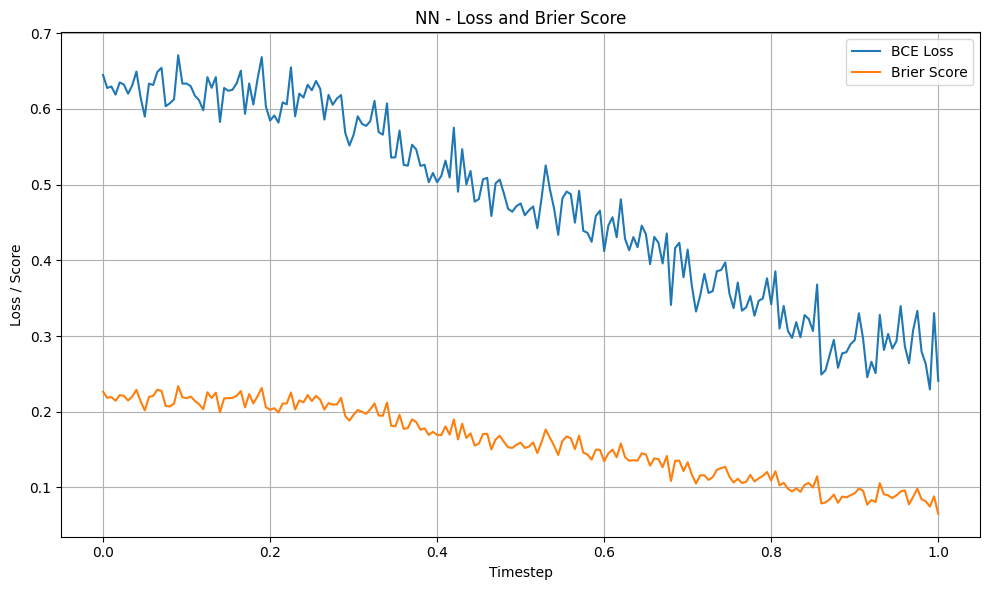

In [54]:
import process_data
modules_to_reload = [
    'process_data',
]

for module_name in modules_to_reload:
    if module_name in sys.modules:
        del sys.modules[module_name]

x = process_data.plot_loss(models, test_data, "NN")

In [16]:
%load_ext autoreload
%autoreload 2

In [17]:
%reload_ext autoreload

PermutationExplainer explainer: 365it [00:13,  6.95it/s]                         


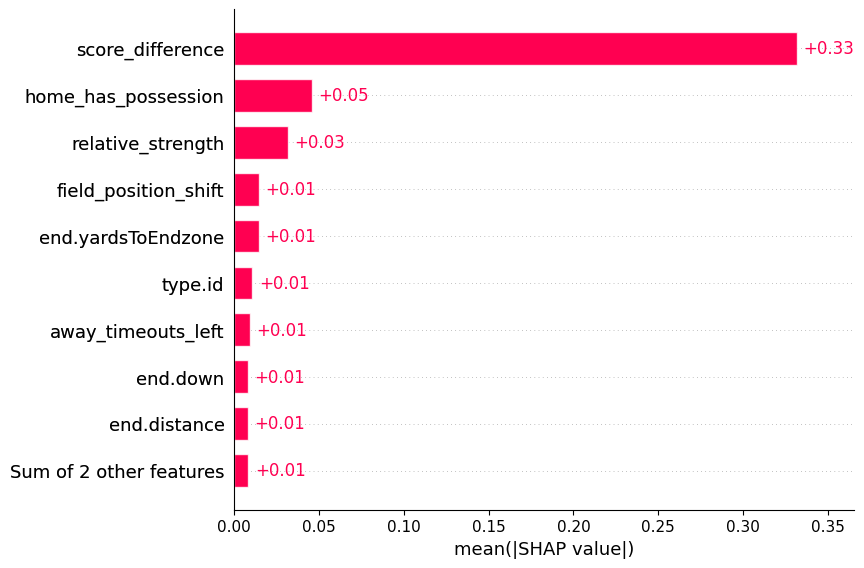

.values =
array([[-5.22444304e-01, -1.75063103e-03,  3.57689166e-03, ...,
        -8.23456611e-03,  1.70319158e-03,  2.02856011e-03],
       [-5.26710978e-01, -9.79733649e-04,  1.93670555e-03, ...,
        -3.83939714e-03,  9.37581235e-04,  1.58019682e-03],
       [-4.83338309e-01, -8.45959098e-04, -3.30062502e-04, ...,
        -8.01757826e-03, -9.87743796e-04,  2.55215049e-03],
       ...,
       [ 2.53334097e-01, -5.68626230e-03, -2.58235223e-02, ...,
        -2.59786324e-02, -3.19025597e-03, -5.29306458e-02],
       [ 2.77540613e-01,  2.48721609e-04, -1.46657779e-02, ...,
        -3.31360355e-02, -1.49815454e-02,  2.71557215e-03],
       [ 2.03108740e-01, -9.69217704e-04,  1.02640502e-02, ...,
        -9.90007754e-04,  4.29256542e-04,  5.13956415e-03]])

.base_values =
array([0.54075061, 0.54075061, 0.54075061, 0.54075061, 0.54075061,
       0.54075061, 0.54075061, 0.54075061, 0.54075061, 0.54075061,
       0.54075061, 0.54075061, 0.54075061, 0.54075061, 0.54075061,
       0.5407506

In [ ]:
modules_to_reload = [
    'models.direct_prediction_network',
    'models.direct_prediction_network_transformer',
    'models.utils'
]
from models.utils import SHAP_analysis

SHAP_analysis(models, training_data, test_data, "NN", "shap_values/NN", num_threads = 1)

In [55]:
from process_data import write_predictions
from sklearn.preprocessing import StandardScaler
# Reload the modules
modules_to_reload = [
    'process_data',
]

for module_name in modules_to_reload:
    if module_name in sys.modules:
        del sys.modules[module_name]


write_predictions(models, interpolated_dir, [2024], 0, features, replace_nan_val = 0, phat_b = "NN_phat_b")


Loading data for 2024
Processed file:  game_401671629.csv
Processed file:  game_401671601.csv
Processed file:  game_401671826.csv
Processed file:  game_401671832.csv
Processed file:  game_401671749.csv
Processed file:  game_401671775.csv
Processed file:  game_401671761.csv
Processed file:  game_401671760.csv
Processed file:  game_401671774.csv
Processed file:  game_401671748.csv
Processed file:  game_401671833.csv
Processed file:  game_401671827.csv
Processed file:  game_401671600.csv
Processed file:  game_401671628.csv
Processed file:  game_401671616.csv
Processed file:  game_401671831.csv
Processed file:  game_401671825.csv
Processed file:  game_401671819.csv
Processed file:  game_401671762.csv
Processed file:  game_401671776.csv
Processed file:  game_401671789.csv
Processed file:  game_401671788.csv
Processed file:  game_401671777.csv
Processed file:  game_401671763.csv
Processed file:  game_401671818.csv
Processed file:  game_401671824.csv
Processed file:  game_401671830.csv
Proces

In [56]:

import os
import shutil

# Define the ancestor directory and the parent directory
src_dir = os.path.abspath(os.path.join(os.getcwd(), ".."))  # Adjust the number of "../" as needed
dest_dir = os.path.abspath(os.path.join(os.getcwd(), "../../"))

# Specify the file or directory to copy from the ancestor directory
source = os.path.join(src_dir, "dataset_interpolated_fixed", "2024")  # Replace with the actual name
destination = os.path.join(dest_dir, "test_7", "NN_model")  # Replace with the desired name

# Perform the copy operation
if os.path.exists(source):
    if os.path.isdir(source):
        shutil.copytree(source, destination)
    else:
        shutil.copy2(source, destination)
    print(f"Copied '{source}' to '{destination}'")
else:
    print(f"Source '{source}' does not exist")

Copied '/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL/ML/dataset_interpolated_fixed/2024' to '/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL/test_7/NN_model'
